<a href="https://colab.research.google.com/github/lesijay/FinanceProject/blob/master/FinanceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [4]:
BAC = data.DataReader("BAC", 'yahoo', '2006-01-01', '2016-01-01')
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.717861
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.338535
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.384048
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.330940
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.353695


In [5]:
C = data.DataReader("C", 'yahoo', '2006-01-01', '2016-01-01')
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,448.516144
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,440.235657
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,442.419647
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,442.419647
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,440.326721


In [6]:
GS = data.DataReader("GS", 'yahoo', '2006-01-01', '2016-01-01')
GS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,108.843384
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,107.339996
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,107.297760
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,108.818047
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,110.127205


In [7]:
JPM = data.DataReader("JPM", 'yahoo', '2006-01-01', '2016-01-01')
JPM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.994356
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,27.832783
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,27.917086
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,28.113771
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,28.570408


In [8]:
MS = data.DataReader("MS", 'yahoo', '2006-01-01', '2016-01-01')
MS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,38.006454
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,38.032536
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,38.136818
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,38.175922
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,38.580029


In [9]:
WFC = data.DataReader("WFC", 'yahoo', '2006-01-01', '2016-01-01')
WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,21.246769
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,21.000326
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.977020
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,21.100231
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,21.096903


In [0]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [0]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis =1, keys=tickers)

In [0]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [16]:
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  21.246769
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  21.000326
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.977020
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  21.100231
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  21.096903

[5 rows x 36 columns]

In [17]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [0]:
returns = pd.DataFrame()

In [20]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


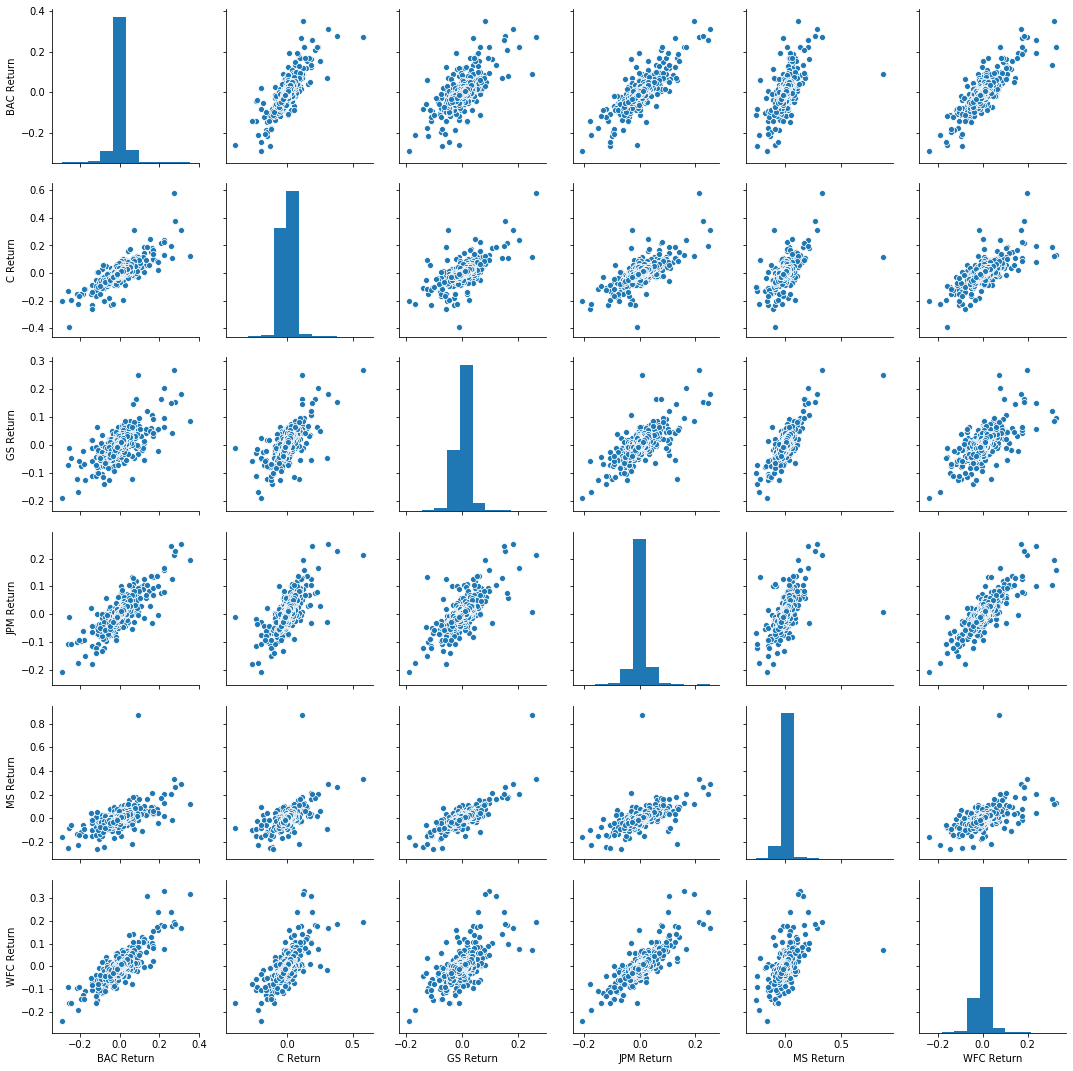

In [22]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [23]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [24]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [25]:
returns.std() 

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [28]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

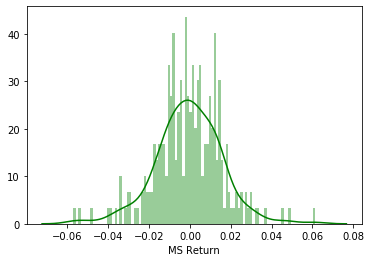

In [29]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

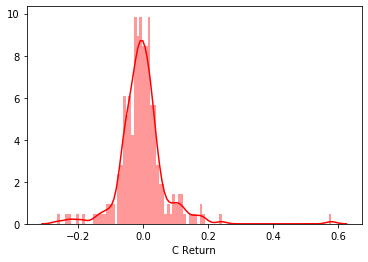

In [30]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()


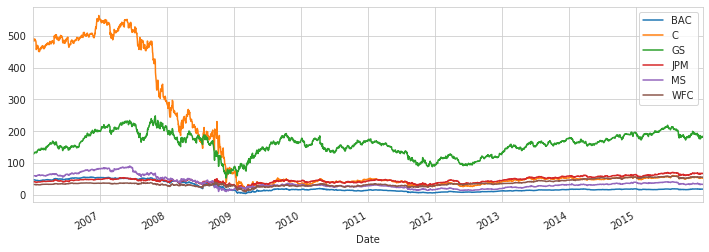

In [43]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

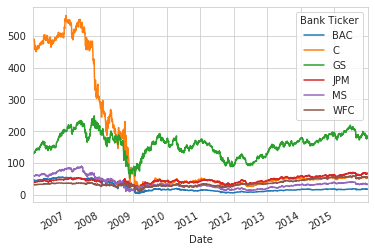

In [44]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [45]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

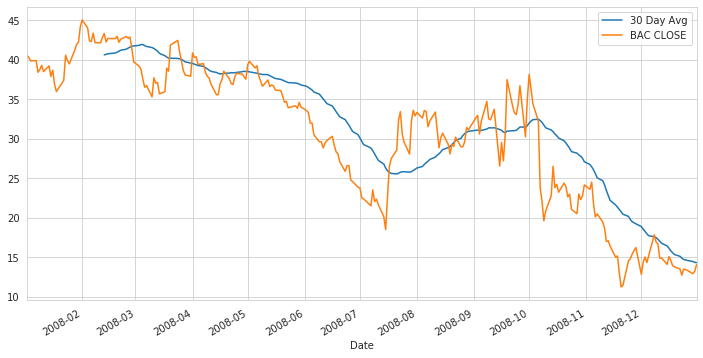

In [36]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

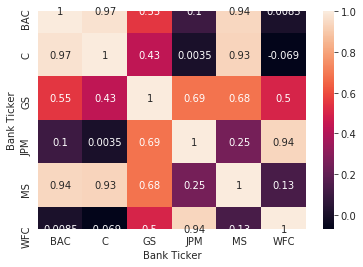

In [37]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

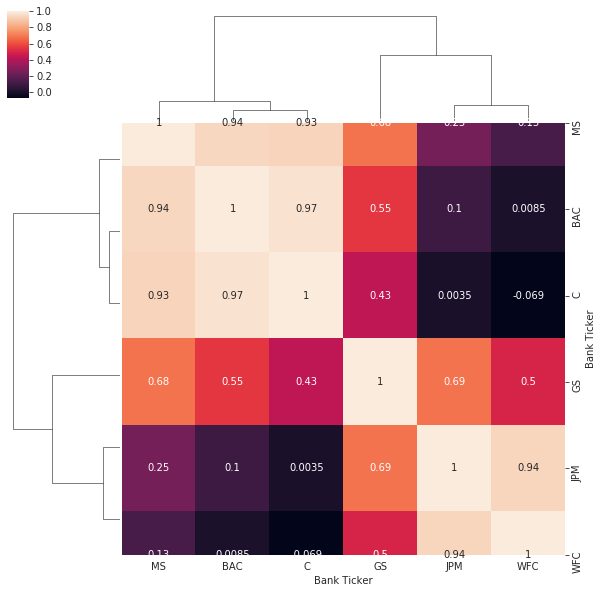

In [38]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [41]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')